# EDA & Visualization of POS_CASH_BALANCE

#### THIS IS JUST A BRIEF ANALYSYS! NOT FINAL!
#### Presented to you, by Bram

## Viable Features
- `SK_ID_CURR` (ID unik klien)
- `MONTHS_BALANCE` (prev month balance)
- `CNT_INSTALMENT` (jumlah cicilan)
- `CNT_INSTALMENT_FUTURE` (jumlah cicilan di masa depan)
- `NAME_CONTRACT_STATUS` (status kontrak)

## Import Library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

## Import Data

In [15]:
df_master = pd.read_csv('POS_CASH_balance.csv')

In [5]:
df_master.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [11]:
df_master.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [15]:
df_master.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [22]:
list_item_master = []

for col in df_master.columns:
    list_item_master.append([
        col,                       
        df_master[col].dtype,       
        df_master[col].isna().sum(),
        100 * df_master[col].isna().sum() / len(df_master[col]), 
        df_master[col].nunique(), 
        df_master[col].unique()[:5] 
    ])

desc_df = pd.DataFrame(data=list_item_master, columns=[
    'feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'
])

desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,SK_ID_PREV,int64,0,0.000000,936325,"[1803195, 1715348, 1784872, 1903291, 2341044]"
1,SK_ID_CURR,int64,0,0.000000,337252,"[182943, 367990, 397406, 269225, 334279]"
2,MONTHS_BALANCE,int64,0,0.000000,96,"[-31, -33, -32, -35, -38]"
3,CNT_INSTALMENT,float64,26071,0.260675,73,"[48.0, 36.0, 12.0, 24.0, 60.0]"
4,CNT_INSTALMENT_FUTURE,float64,26087,0.260835,79,"[45.0, 35.0, 9.0, 42.0, 12.0]"
5,NAME_CONTRACT_STATUS,object,0,0.000000,9,"[Active, Completed, Signed, Approved, Returned..."
6,SK_DPD,int64,0,0.000000,3400,"[0, 1, 2, 4, 3]"
7,SK_DPD_DEF,int64,0,0.000000,2307,"[0, 1, 2, 4, 3]"


Berdasarkan informasi diatas, dapat diperoleh beberapa hal berikut:

1. **Sebaran Data Tidak Normal**:
   - Kolom `CNT_INSTALMENT` dan `CNT_INSTALMENT_FUTURE` memiliki nilai maksimum yang jauh lebih besar dibandingkan dengan nilai mean, median (Q2), dan Q3. Ini mengindikasikan bahwa terdapat kemungkinan **outlier** atau **kesalahan input data** pada kedua kolom ini.
   - Kolom `SK_DPD` dan `SK_DPD_DEF` juga menunjukkan perbedaan signifikan antara nilai maksimum dengan nilai mean dan Q3, yang menunjukkan bahwa data pada kolom ini mungkin memiliki **distribusi yang skewed** atau terdapat beberapa nilai yang sangat tinggi dibandingkan dengan yang lainnya, sehingga menyebabkan ketidakseimbangan sebaran data.

2. **Nilai Minimum dan Sebaran**:
   - Kolom `MONTHS_BALANCE` memiliki rentang nilai yang cukup besar dari -96 hingga -1, yang menunjukkan bahwa data ini mungkin berisi catatan historis dari bulan ke bulan hingga saat ini.
   - Nilai-nilai minimum pada kolom `CNT_INSTALMENT` dan `CNT_INSTALMENT_FUTURE` adalah 0 dan 1, yang menunjukkan bahwa terdapat beberapa kontrak dengan jumlah angsuran yang sangat rendah atau mungkin sudah hampir selesai.

Berdasarkan tabel deskripsi pada data kategori:

- Kolom `NAME_CONTRACT_STATUS` memiliki **9 nilai unik**, yang dapat dianggap wajar untuk menggambarkan berbagai status kontrak yang mungkin ada, seperti **Active**, **Completed**, **Signed**, dll.
- Sebaran frekuensi nilai pada kolom `NAME_CONTRACT_STATUS` tidak terlihat timpang, yang menunjukkan bahwa setiap kategori kontrak memiliki representasi yang cukup proporsional di dalam dataset, tanpa ada ketimpangan yang signifikan di antara berbagai kategori status kontrak.

Secara keseluruhan, terdapat indikasi ketidakseimbangan data dalam beberapa kolom numerik yang mungkin memerlukan perlakuan khusus, seperti identifikasi dan penanganan outlier atau normalisasi data. Sementara itu, kolom kategori menunjukkan distribusi yang cukup wajar tanpa indikasi ketimpangan nilai yang berlebihan.

## Distribusi Data

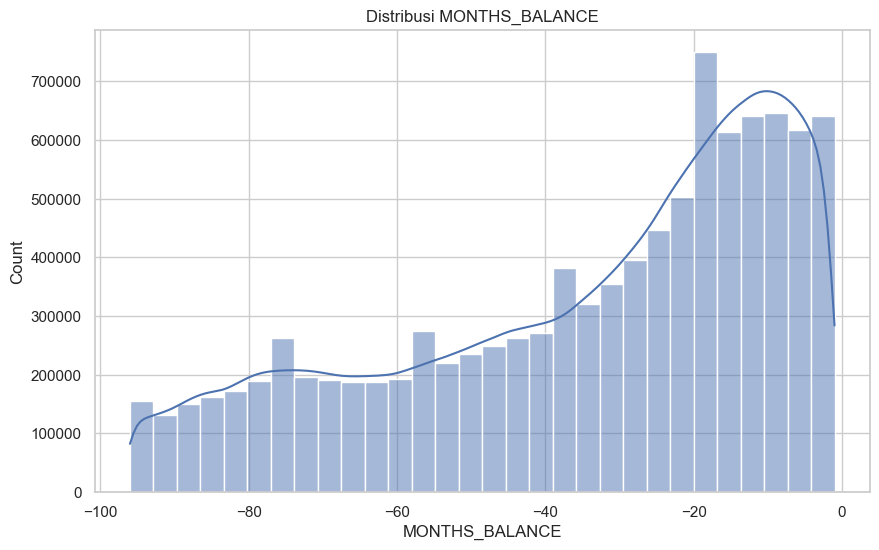

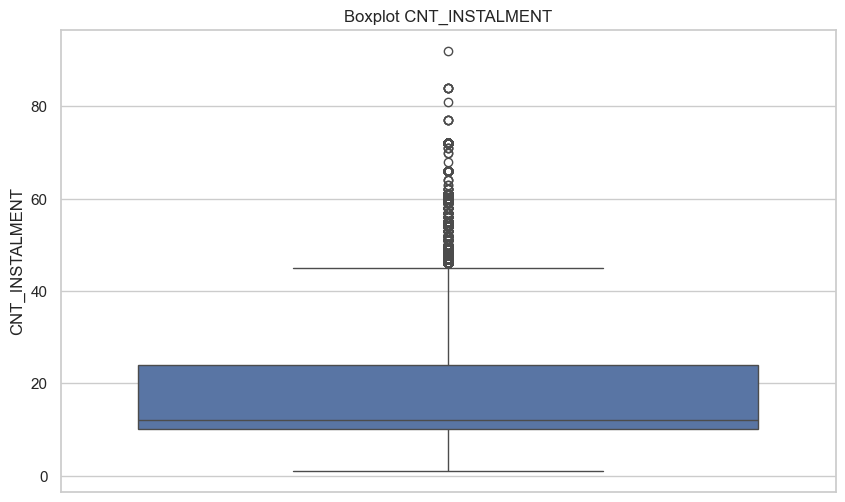

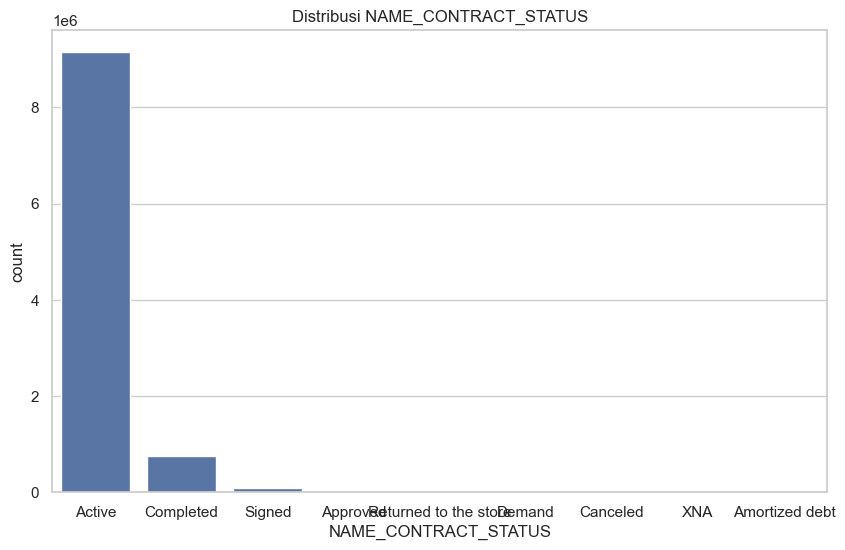

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_master['MONTHS_BALANCE'], kde=True, bins=30)
plt.title('Distribusi MONTHS_BALANCE')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='CNT_INSTALMENT', data=df_master)
plt.title('Boxplot CNT_INSTALMENT')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Distribusi NAME_CONTRACT_STATUS')
plt.show()

## Korelasi Antar Atribut

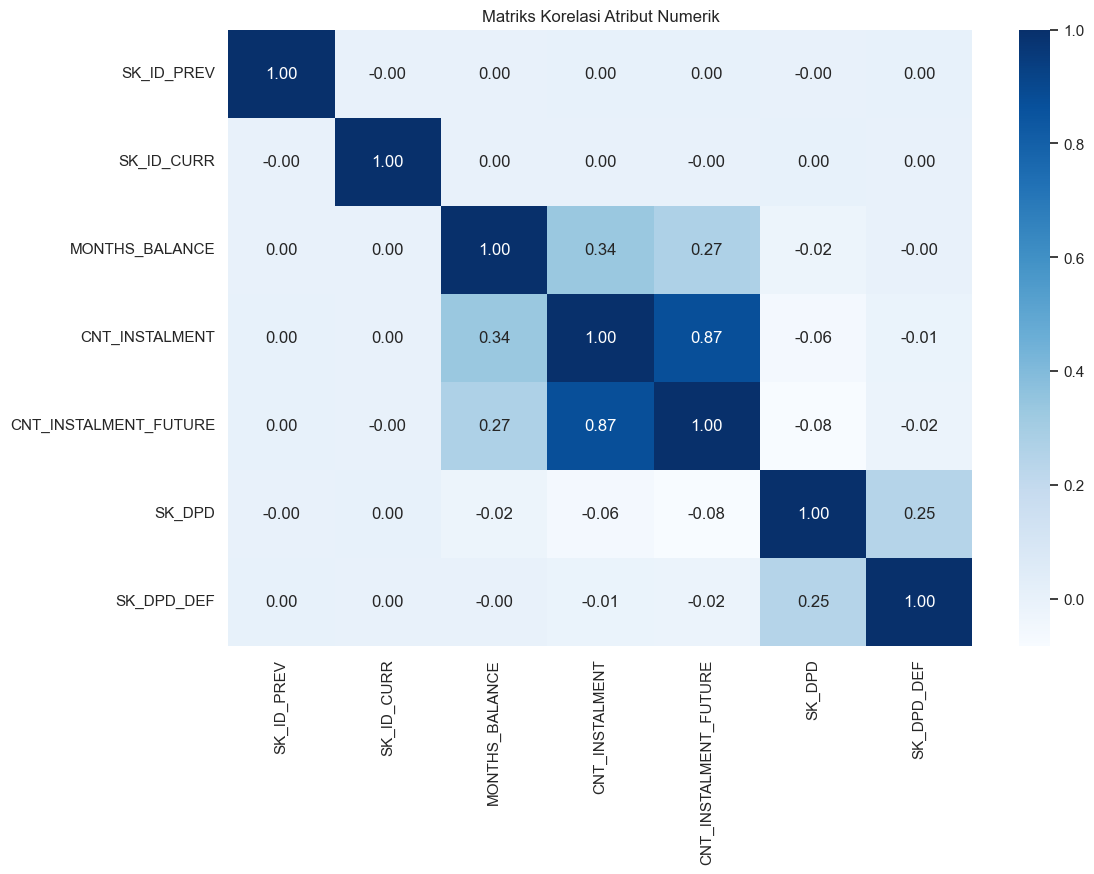

In [30]:
plt.figure(figsize=(12, 8))
numeric_df = df_master.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriks Korelasi Atribut Numerik')
plt.show()

## Analisis Hubungan Antar Fitur

### CNT_INSTALMENT dengan NAME_CONTRACT_STATUS

C:\Users\brama\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


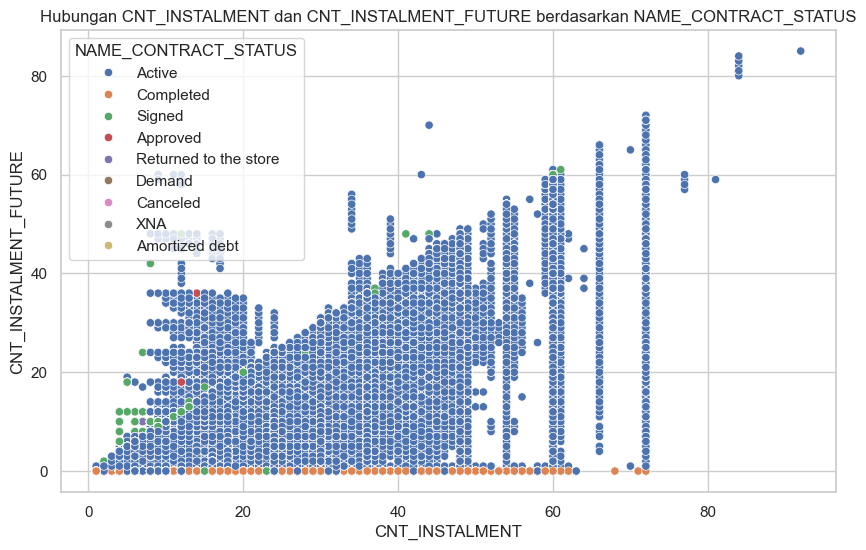

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNT_INSTALMENT', y='CNT_INSTALMENT_FUTURE', hue='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Hubungan CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE berdasarkan NAME_CONTRACT_STATUS')
plt.show()

### Pair Plot

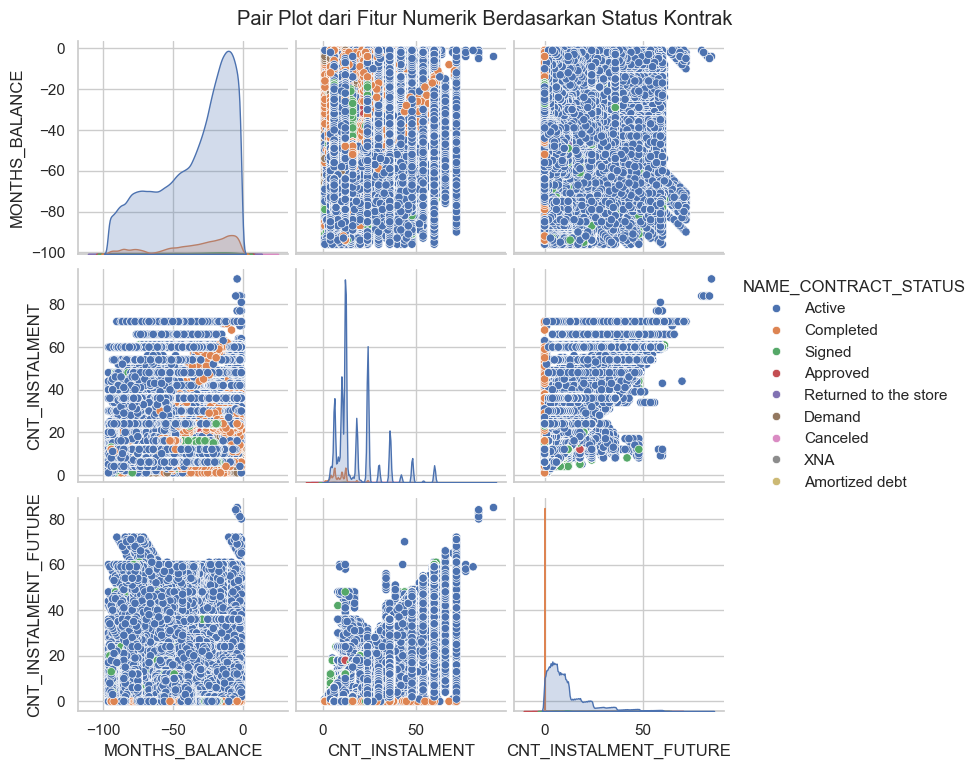

In [43]:
sns.pairplot(df_master, vars=['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], hue='NAME_CONTRACT_STATUS')
plt.suptitle('Pair Plot dari Fitur Numerik Berdasarkan Status Kontrak', y=1.02)
plt.show()

### CNT_INSTALMENT Berdasarkan Status Kontrak

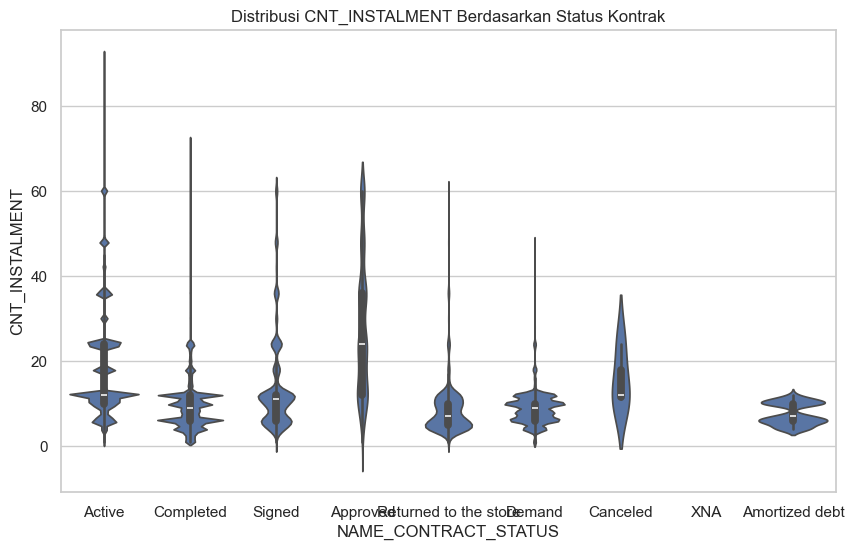

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Distribusi CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

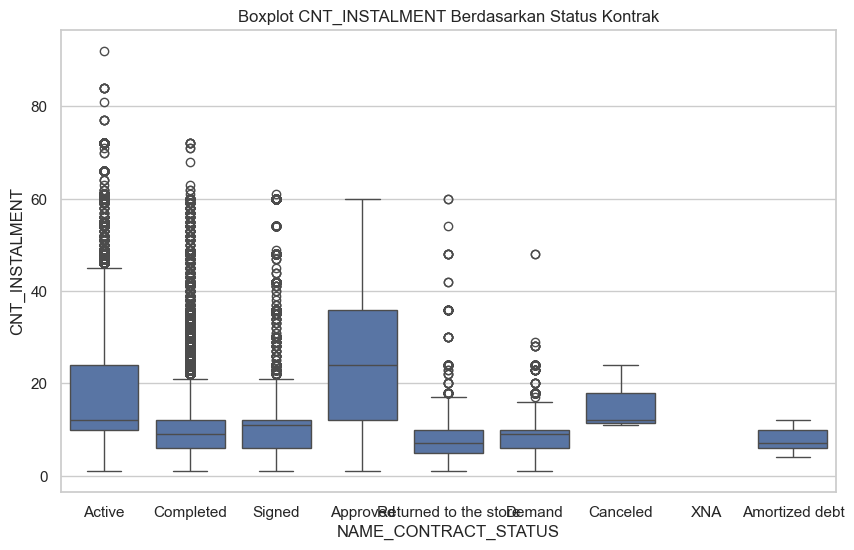

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Boxplot CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

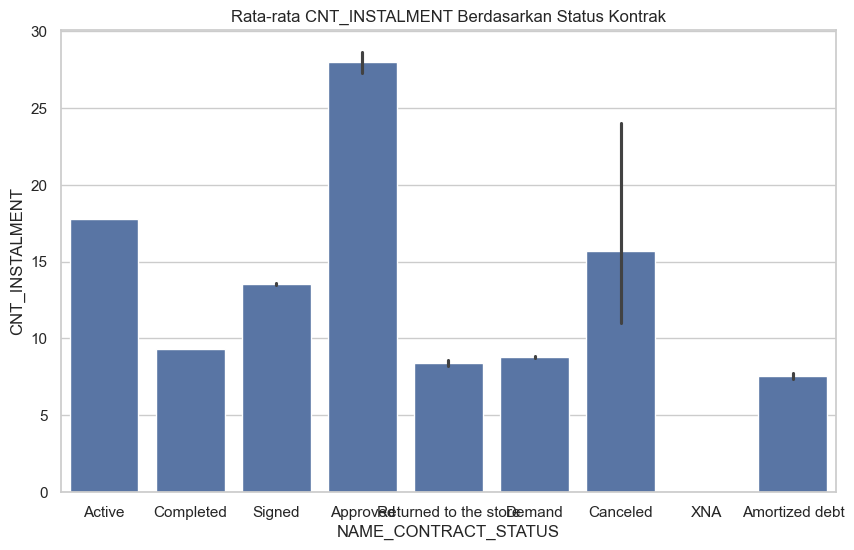

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Rata-rata CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

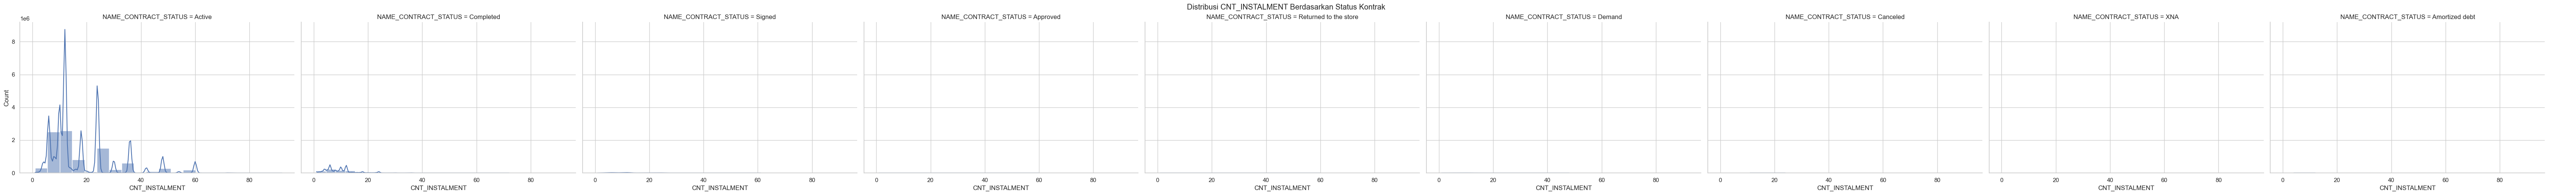

In [57]:
g = sns.FacetGrid(df_master, col="NAME_CONTRACT_STATUS", height=5, aspect=1.5)
g.map(sns.histplot, "CNT_INSTALMENT", bins=20, kde=True)
g.add_legend()
plt.suptitle('Distribusi CNT_INSTALMENT Berdasarkan Status Kontrak', y=1.02)
plt.show()

### CNT Instalment dengan CNT_INSTALMENT_FUTURE

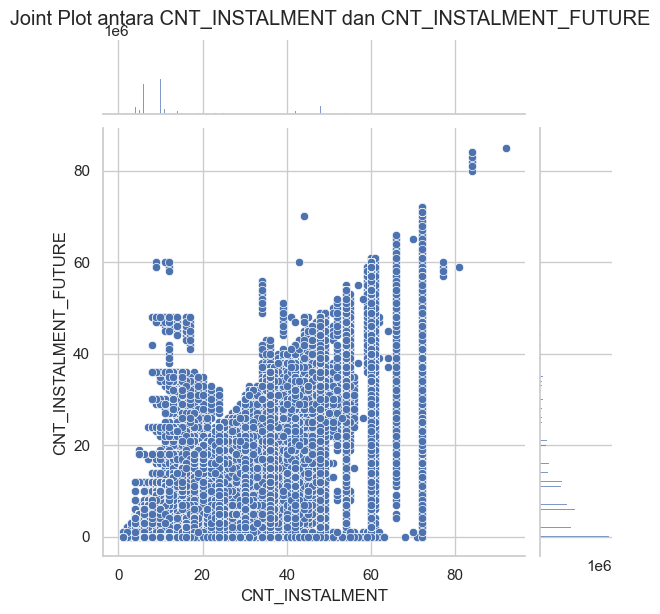

In [63]:
sns.jointplot(x='CNT_INSTALMENT', y='CNT_INSTALMENT_FUTURE', data=df_master, kind='scatter')
plt.suptitle('Joint Plot antara CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE', y=1.02)
plt.show()

### Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan Status Kontrak

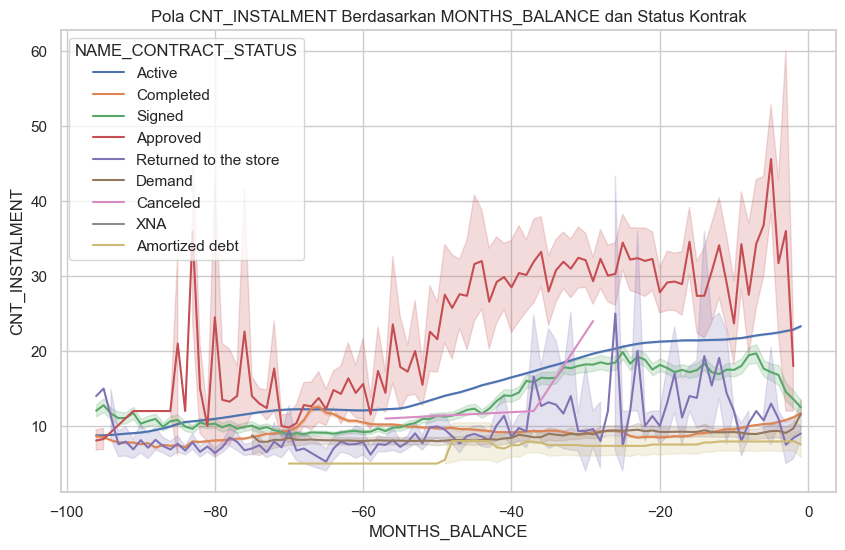

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTHS_BALANCE', y='CNT_INSTALMENT', hue='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan Status Kontrak')
plt.show()

## Insight & Recommendation (Long and Not Summarized)

### Insights:

1. **Contract Status Distribution**:
   - The majority of the data points are in the **"Active"** contract status, suggesting that most customers are still in the process of repaying their installments.
   - There are also visible clusters of **"Completed"** and **"Signed"** contracts, though these represent fewer cases.
   - **"Canceled"** contracts have a unique distribution, where they consistently appear with zero future installments, as expected.

2. **Relationship between CNT_INSTALMENT and CNT_INSTALMENT_FUTURE**:
   - As the number of **CNT_INSTALMENT** (total installments) increases, the **CNT_INSTALMENT_FUTURE** (remaining installments) tends to decrease, which is logical. However, there are some contracts that still show higher future installments even when total installments are high, which might indicate extended contract terms or anomalies.
   - There is a clear concentration of contracts around specific total installment numbers (e.g., 20, 40, 60), suggesting a standardized installment structure.

3. **MONTHS_BALANCE Distribution**:
   - The `MONTHS_BALANCE` feature shows a distribution that skews heavily towards negative values, especially for "Active" contracts. This likely indicates the time since the account was opened, where negative values represent the number of months before the present. Contracts with recent balances (closer to 0) are mostly active.
   - For "Completed" contracts, the `MONTHS_BALANCE` tends to cluster around higher negative values, indicating these contracts were finalized earlier.

4. **Installment Behavior (`CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`)**:
   - Similar to the previous plot, **active contracts** dominate the space of high installment counts and high remaining future installments. 
   - Contracts with zero remaining installments (mostly labeled as "Completed" or "Canceled") have no future obligations, showing the expected behavior.
   - There are clear clusters of contract terms around certain `CNT_INSTALMENT` values, reinforcing the idea that standardized contract lengths are common.

5. **Active Contracts**:
   - The median number of installments is around 15-20.
   - There are many outliers, with some contracts having more than 80 installments.
   - The data for active contracts is widely dispersed, indicating variability in installment counts.

6. **Completed Contracts**:
   - Median installments are lower compared to active contracts (around 10).
   - Fewer outliers and a more compact interquartile range (IQR), indicating that completed contracts tend to have a smaller and more consistent number of installments.

7. **Signed Contracts**:
   - Similar distribution as completed contracts, with a median close to 10.
   - Less variability, and there are some outliers, but fewer compared to active contracts.

8. **Approved Contracts**:
   - The median number of installments is significantly higher (around 30), and there is high variability.
   - There are a few extreme outliers (above 60 installments).
   - The wider range and higher median suggest that approved contracts may require more extensive installment plans.

9. **Other Contract Statuses (Returned, Demand, Canceled, XNA, Amortized Debt)**:
   - All these categories show fewer installments, with median values under 10.
   - These statuses have lower variability, smaller ranges, and some outliers.
   - `XNA` and `Amortized debt` have particularly small ranges, suggesting these statuses are associated with fewer installments.

10. **Approved Contracts**:
   - The highest average number of installments is observed in the "Approved" category, with an average close to 30 installments. This suggests that approved contracts tend to have longer payment plans.
   
11. **Active Contracts**:
   - The average number of installments for active contracts is around 15-20, indicating a moderate length of payment plans compared to approved contracts.
   
12. **Completed Contracts**:
   - Completed contracts have a lower average number of installments, close to 10. This indicates that contracts that reach completion usually have shorter installment plans.
   
13. **Signed Contracts**:
   - Similar to completed contracts, signed contracts also tend to have an average number of installments around 12-15, which suggests that these contracts might have a lower financial commitment or a quicker path to resolution.
   
14. **Other Contract Statuses**:
   - **Canceled** contracts show an average of around 20 installments, but with higher variance, suggesting that canceled contracts have less consistency in their installment plans.
   - **Returned to the store**, **Demand**, and **Amortized debt** contracts show lower averages, indicating shorter or less intensive payment plans.
   - **XNA** contracts have a very low average and represent a distinct type of contract.

15. **Active Contracts**:
   - The highest density of `CNT_INSTALMENT` values for active contracts is concentrated between 0 to 20 installments, with a few spikes around 15 and 20.
   - There is a long tail, but the vast majority of contracts fall within this lower range, indicating most active contracts involve shorter-term installment plans.

16. **Completed, Signed, Approved, Demand, and Other Statuses**:
   - For other contract statuses like Completed, Signed, Approved, Demand, and Canceled, the plots seem to have very few or no entries, showing that these statuses either have a smaller number of records or fewer installments in this range.
   - The lack of spread for statuses like "Approved" or "Canceled" suggests that these may have been filtered or the dataset is skewed towards the "Active" category.

17. **Positive Correlation**: The joint plot shows a positive correlation between `CNT_INSTALMENT` (the number of past installments) and `CNT_INSTALMENT_FUTURE` (the number of future installments). As the number of past installments increases, the number of future installments also tends to increase.
   
18. **Density of Data Points**: A high density of points appears between the ranges of 0–60 for `CNT_INSTALMENT` and 0–80 for `CNT_INSTALMENT_FUTURE`. This indicates that the majority of customers have relatively lower installment counts both in the past and future.

19. **Discrete Nature**: Both axes show discrete steps, particularly visible for `CNT_INSTALMENT_FUTURE`, where certain values have more frequent occurrences (e.g., multiples of 5 or 10). This could mean installment plans are structured in specific ranges.

20. **Outliers**: A few data points with significantly high `CNT_INSTALMENT` values (close to 1 million) could indicate extreme cases or outliers, which might require further investigation.

21. **Contract Status Trends**:
   - **Approved** (red line): This status has the highest variability and peaks, especially as `MONTHS_BALANCE` approaches 0 (the present time). This indicates that contracts with this status tend to involve a higher number of installments over time, with some significant spikes.
   - **Active** (blue line): A steady upward trend can be seen, with the number of installments increasing gradually as the present time (MONTHS_BALANCE = 0) approaches.
   - **Completed** (purple line): The number of installments is quite stable with a slight increase, suggesting that completed contracts maintain a moderate level of installments throughout the contract term.
   - **Signed** (green line): Similar to completed contracts, this status shows a relatively stable and consistent number of installments, indicating fewer changes in contract conditions.
   - **Canceled** (light pink line): There are notable peaks and variability, suggesting some fluctuations in the number of installments before the contract was canceled.
   - **Amortized Debt** (yellow line), **Returned to the Store**, and **Demand**: These statuses have lower and more stable installment counts, indicating they represent a smaller subset of cases or contracts with fewer payments over time.
   
22. **Time Patterns**:
   - **Negative `MONTHS_BALANCE`**: Represents the past relative to the current time. The majority of statuses (except `Approved`) show relatively flat or consistent trends in installment counts up until about -40 to -20 months, where the number of installments begins to increase for some contract types.
   - **Near Present (`MONTHS_BALANCE = 0`)**: There's an observable rise in `CNT_INSTALMENT` as contracts reach the present. This rise is especially prominent for contracts in the `Approved` and `Active` status.

23. **Variability**: The shaded regions around the lines represent variability. `Approved` and `Canceled` contracts show high variability, indicating a wide range of installment counts for these statuses. In contrast, statuses like `Completed`, `Signed`, and `Amortized Debt` show relatively low variability, suggesting more consistency in their installment structures.

24. **Strong Correlation Between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`**: 
   - The correlation between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` is **0.87**, indicating a strong positive relationship. As the number of past installments increases, the number of future installments also tends to increase. This confirms the trend observed in the joint plot you shared earlier.

25. **Moderate Correlation Between `MONTHS_BALANCE` and Installments**:
   - There’s a moderate positive correlation between `MONTHS_BALANCE` and `CNT_INSTALMENT` (**0.34**) and a slightly lower correlation with `CNT_INSTALMENT_FUTURE` (**0.27**). This suggests that as the contract nears the present (i.e., `MONTHS_BALANCE` approaches 0), there is an increase in installment activity.

26. **Low Correlation Between `SK_DPD`/`SK_DPD_DEF` and Other Variables**:
   - `SK_DPD` (Days Past Due) and `SK_DPD_DEF` (Days Past Due with Default) have very low correlations with most of the other variables. However, there’s a **0.25** correlation between `SK_DPD` and `SK_DPD_DEF`, which is expected as they both relate to overdue payments.
   - There is little to no correlation between overdue payments (`SK_DPD`, `SK_DPD_DEF`) and the number of installments (`CNT_INSTALMENT`, `CNT_INSTALMENT_FUTURE`), which could indicate that overdue payments don’t directly increase or decrease the number of installments.

27. **No Correlation Between IDs (`SK_ID_PREV`, `SK_ID_CURR`) and Other Variables**:
   - Both `SK_ID_PREV` and `SK_ID_CURR` are identifiers and, as expected, show no correlation with any of the other variables.


### Preprocessing Recommendations:

1. **Handling Outliers**:
   - The visualization shows some potential outliers, such as contracts with very high numbers of installments and future installments. These may represent special cases that should either be further investigated or removed to avoid skewing the model.

2. **Categorical Encoding**:
   - The `NAME_CONTRACT_STATUS` is a categorical feature and should be encoded properly. For machine learning purposes, using techniques like **One-Hot Encoding** or **Target Encoding** may be beneficial.

3. **Feature Scaling**:
   - Features such as **CNT_INSTALMENT** and **CNT_INSTALMENT_FUTURE** are numerical and may benefit from **scaling** (e.g., Min-Max Scaling or Standard Scaling), especially for models sensitive to feature magnitude.

4. **Feature Engineering**:
   - Create a new feature for **remaining installments percentage**: 
     \[
     \text{remaining\_instalments\_pct} = \frac{CNT\_INSTALMENT\_FUTURE}{CNT\_INSTALMENT}
     \]
     This could help understand how much of the loan is left to be paid and provide valuable input for risk assessment.

5. **Normalization of MONTHS_BALANCE**:
   - Since `MONTHS_BALANCE` has a wide range of negative values, it would benefit from **scaling or normalization** (e.g., Min-Max scaling). This could ensure that machine learning models treat this feature in an appropriate range for comparison with other features.

6. **Handling Categorical Variables**:
   - As before, the **NAME_CONTRACT_STATUS** is a categorical variable that should be **one-hot encoded** or **target encoded**, depending on the model being used. This feature likely contains valuable information about the risk level based on contract status.

7. **Outlier Detection and Treatment**:
   - The distribution shows some potential outliers, particularly in `CNT_INSTALMENT_FUTURE`, where a few contracts have high future installments. Investigate these cases to determine if they are legitimate data points or errors.
   - Removing or capping these outliers could help improve model performance, as they might distort the overall learning process.

8. **Time Feature Engineering**:
   - Convert `MONTHS_BALANCE` into **time-related buckets** or derive new features that measure how long the account has been active or dormant. For example:
     - `account_duration = abs(MONTHS_BALANCE.max() - MONTHS_BALANCE.min())`
     - This could give an idea of how long an account has been active or open.

9. **Outlier Handling**:
   - Since there are many outliers (especially in `Active` and `Approved` contracts), consider using robust methods like log transformation or winsorization to reduce the impact of extreme values.
   - Alternatively, filtering out extreme outliers (e.g., contracts with `CNT_INSTALMENT` above a threshold like 80) might make the data more representative.

10. **Normalization or Standardization**:
   - The number of installments varies widely across categories, so it may be beneficial to standardize or normalize `CNT_INSTALMENT` if you intend to use it for further analysis, especially for machine learning models.

11. **Handling Imbalanced Classes**:
   - Some contract statuses (e.g., `Canceled`, `XNA`, `Amortized debt`) seem underrepresented. For predictive modeling, you might want to consider balancing techniques like oversampling or using SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.

12. **Feature Engineering**:
   - **Contract Duration**: You can create a feature representing contract duration based on `CNT_INSTALMENT` to improve the model's ability to predict contract outcomes.
   - **Group Aggregation**: Aggregate features like the mean or median `CNT_INSTALMENT` per contract status for analysis, allowing a more straightforward comparison between contract statuses.

13. **Handling Missing or Rare Categories**:
   - The `XNA` category has a very low average installment count and may represent missing or irrelevant data. Consider either excluding this category or further investigating its meaning to handle it appropriately.
   
14. **Outlier Handling**:
   - The high variance in the "Canceled" category suggests there could be outliers. You can apply techniques like **winsorization** or **removal of extreme outliers** to reduce their impact on the analysis.

15. **Normalization/Standardization**:
   - Since the number of installments varies greatly across categories, standardization may help if you plan to use this feature for predictive modeling or clustering. This will ensure that each contract status has equal weight during analysis.

16. **Categorical Encoding**:
   - If using contract status as a feature for modeling, use techniques like **one-hot encoding** to convert the categorical variable into numerical format. This will be particularly useful if you plan to use machine learning models.

17. **Aggregating Features**:
   - Consider calculating additional statistics like the median, standard deviation, or variance of `CNT_INSTALMENT` for each contract status, which could provide more robust features for analysis.

18. **Imbalanced Data**:
   - There is a clear imbalance in the data between the different contract statuses, particularly in the `Approved` and `Canceled` categories, which have little to no data points in this plot. Consider **oversampling** or **undersampling** techniques (e.g., SMOTE, Random Oversampling) if you plan to use these categories in a machine learning model to avoid bias towards the majority class (e.g., Active).

19. **Log Transformation or Binning**:
   - Given the high density in the lower range (0-20 installments) and the long tail, applying a **log transformation** can help normalize the distribution. Alternatively, **binning** the `CNT_INSTALMENT` values into categories (e.g., Short-term, Medium-term, Long-term) could simplify the analysis and help manage the skewed distribution.

20. **Handle Missing Data**:
   - Contract statuses like `XNA` and `Amortized debt` might have too few data points. Consider investigating these statuses further or **removing them** if they do not provide significant insights or are considered outliers. You may also want to replace `XNA` if it represents missing or erroneous data.

21. **Feature Scaling**:
   - Since the `CNT_INSTALMENT` values vary significantly across contract statuses, applying **feature scaling** (e.g., Min-Max scaling or StandardScaler) could be beneficial for models that rely on distance-based metrics, such as KNN or SVM.

22. **Outlier Detection**: The points at very high `CNT_INSTALMENT` values could be outliers. You might need to apply an outlier detection method (e.g., Z-score or IQR) to determine if these data points should be removed or treated differently.

23. **Normalization/Scaling**: Since the `CNT_INSTALMENT` feature spans a wide range (from small values to nearly a million), normalizing or scaling the data (using MinMaxScaler or StandardScaler) would help machine learning models process the features more effectively.

24. **Handling Discrete Data**: If the `CNT_INSTALMENT_FUTURE` feature is highly discrete (e.g., frequently falling on multiples of 5 or 10), consider treating it as a categorical feature or apply techniques like binning to convert continuous data into ranges.

25. **Feature Engineering**: 
   - You could create new features, such as the ratio between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`, which may help identify customers nearing the end of their installment plan versus those who are just beginning.
   - Calculate the difference between these two variables to segment customers into groups (e.g., those who have completed more installments than future ones or vice versa).

26. **Time-Series Analysis**: Since `MONTHS_BALANCE` represents time, it may be helpful to treat this as a temporal variable. Consider using time-based features such as rolling averages or time lags when building predictive models.
   
27. **Handling Missing or Anomalous Statuses**: Some contract statuses, such as `XNA`, may need further investigation. If these values are not valid, consider imputing or removing them.

28. **Feature Encoding**:
   - **Categorical Encoding**: Encode the `NAME_CONTRACT_STATUS` feature. Depending on the machine learning model you plan to use, one-hot encoding or label encoding could be applied. If there's a temporal aspect to certain contract statuses, ordinal encoding might also be considered.

29. **Outlier Handling**: Contracts with high spikes in installments (particularly in `Approved` and `Canceled` statuses) could be considered outliers. Depending on the model and business case, you might want to treat them separately, cap their values, or apply transformations.

30. **Scaling**: Since `CNT_INSTALMENT` values vary across different statuses, scaling the data may be necessary to ensure all features have equal importance in predictive models.

31. **Dimensionality Reduction**:
   - Since `SK_ID_PREV` and `SK_ID_CURR` are identifiers and show no correlation with any of the target variables, they can be excluded from the predictive modeling process. They don’t provide any meaningful information and could add unnecessary complexity to the model.

32. **Feature Scaling**:
   - Although most of the correlations are not extreme, applying feature scaling techniques like **StandardScaler** or **MinMaxScaler** would help standardize the range of numeric variables like `CNT_INSTALMENT`, `CNT_INSTALMENT_FUTURE`, `MONTHS_BALANCE`, `SK_DPD`, and `SK_DPD_DEF`. This would be particularly important if these features are to be used in machine learning models.

33. **Outlier Detection**:
   - The correlation matrix shows low correlations for `SK_DPD` and `SK_DPD_DEF` with other features, which may suggest that overdue payments occur randomly in relation to the number of installments. Analyzing and removing or handling outliers in these features might improve model performance.

34. **Feature Engineering**:
   - Given the strong correlation between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`, consider creating derived features like the **difference** or **ratio** between these two variables. This could provide additional insight into customers who have completed most of their installments or those with many future installments remaining.


### Business Recommendations:

1. **Risk Monitoring Based on Installments**:
   - Contracts with very high total and future installments may represent a **higher risk**. Analyzing these contracts in more detail could help prevent defaults by identifying risky customers early on.

2. **Customer Segmentation**:
   - Segment customers based on the status of their contracts. For instance, those with **active** or **signed** contracts can be offered tailored services like **early payment options** or **lower interest rates** to incentivize early loan repayment.

3. **Review Contract Terms**:
   - The clustering of installment numbers suggests that many contracts have similar structures. It might be useful to **review these standard terms** to see if offering more flexible installment plans can reduce the number of canceled or defaulted contracts.

4. **Canceled Contracts**:
   - Since canceled contracts are consistently associated with zero future installments, the business can use this information to **investigate the causes** behind cancellation. Offering preventive solutions like loan restructuring might help reduce cancellations and retain customers.
  
5. **Focus on Active Customers**:
   - The concentration of `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` around specific values for active contracts suggests a large customer base is still repaying loans. Offering **incentives for early repayment**, such as interest discounts or rewards, could help reduce long-term default risks.

6. **Risk-Based Contract Management**:
   - The company should monitor contracts with high values of `CNT_INSTALMENT_FUTURE` as these may represent higher risks. Offering **financial counseling** or **customized repayment plans** could help reduce defaults, especially for clients with large remaining balances.

7. **Targeted Offers for Completed Contracts**:
   - For customers with "Completed" contracts, consider offering **new loan products** or **loyalty rewards**. Since they have successfully completed their loans, they might be more inclined to accept new credit offers or recommend the service to others.

8. **Review and Adjust Contract Terms**:
   - The clusters of installment numbers suggest there is room for more **flexible loan structures**. By diversifying the contract offerings and making them more adaptable to customer needs (e.g., offering more flexible repayment schedules), the company could reduce contract cancellations and attract a wider customer base.
  
9. **Optimization of Installment Plans**:
   - Contracts with a status of `Approved` tend to have more installments, which may increase the customer's financial burden. Consider restructuring the approval process or installment plans for these contracts to make them more manageable, potentially improving customer satisfaction and reducing default rates.

10. **Targeted Actions Based on Contract Status**:
   - The high variability in active contracts' installment counts could indicate different customer segments. You could design tailored financial solutions based on customer needs to offer optimized installment plans, especially for those nearing the higher count of installments.

11. **Risk Assessment**:
   - Contracts with fewer installments, such as `Completed` and `Signed`, have more consistent and manageable ranges. Focus on maintaining this balance for better control over payment schedules and risk mitigation. For statuses with higher variability, such as `Active` and `Approved`, consider using machine learning to predict which contracts are at higher risk of default based on installment trends.

12. **Streamlining Contract Types**:
   - The smaller ranges for categories like `Canceled` and `XNA` could suggest that these statuses are not yielding high returns. Evaluate the performance of contracts with these statuses and streamline or eliminate those that are not contributing to the business's bottom line.

13. **Revise Installment Plans for Approved Contracts**:
   - Approved contracts have the highest average number of installments, which might indicate a higher financial burden for customers. Offering flexible payment options or restructuring these contracts to reduce the number of installments could improve customer satisfaction and reduce default rates.

14. **Target Completed and Signed Contracts for Retargeting**:
   - Since completed and signed contracts tend to have shorter installment plans, these customers may be more inclined to take on new contracts in the future. A **retargeting strategy** aimed at customers who have completed or signed contracts could drive further engagement and retention.

15. **Addressing Canceled Contracts**:
   - Canceled contracts have a higher average number of installments with high variability. This could indicate financial strain leading to cancellations. Consider introducing better screening for financial viability or offering better support and incentives for customers at risk of cancellation.

16. **Create Specific Strategies for Short-Term Contracts**:
   - Contracts with fewer installments, such as **Returned to the store**, **Demand**, and **Amortized debt**, could be managed differently. Shorter payment plans could be marketed to customers seeking quicker resolutions, such as for smaller purchases or low-risk contracts.

17. **Review Active Contracts**:
   - The high density in active contracts within the 0-20 installment range suggests that most customers prefer shorter-term financing options. WOMart could focus on expanding its offerings of short-term financing or provide incentives to customers willing to take longer installment plans, possibly at lower interest rates.

18. **Analyze Low Volume in Other Categories**:
   - The small number of installments for `Approved` and `Canceled` statuses suggests that these contracts either resolve quickly or represent special cases. Investigating why certain contract statuses have few records or short installment periods may uncover operational inefficiencies or specific customer preferences.

19. **Tailor Financial Products**:
   - Given the heavy concentration in the active category, WOMart can segment its customer base based on the number of installments they prefer. For customers choosing shorter installment plans, targeted marketing can offer alternative financial products, such as **loyalty rewards for early payoff** or **discounts on future contracts**.

20. **Improve Data Collection**:
   - For underrepresented contract statuses, improving data collection and analysis of these contracts could provide a clearer picture. This might lead to a better understanding of customer behavior regarding why certain contracts get approved, canceled, or demand-driven.

21. **Customer Segmentation**: Use the relationship between past and future installments to segment customers:
   - **Long-Term Commitments**: Customers with high values for both `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` are in the middle of long-term commitments. They might be interested in offers that reduce their monthly payment or extend the term.
   - **New Customers**: Customers with low `CNT_INSTALMENT` and high `CNT_INSTALMENT_FUTURE` are relatively new to the service and may need encouragement, such as loyalty programs or rewards.
   - **Soon-to-be-Free Customers**: Those with high `CNT_INSTALMENT` but low `CNT_INSTALMENT_FUTURE` are nearing the end of their installment plans. Consider offering them new services or products to retain their business.

22. **Retention Strategies**: For customers nearing the completion of their installment plans, consider launching marketing campaigns offering upgrades or discounts on future products. Additionally, you could analyze whether these customers tend to switch providers or products once they finish their payments and build strategies accordingly.

23. **Risk Management**: Outliers with abnormally high `CNT_INSTALMENT` could be risky customers. Investigating these cases may uncover fraudulent behavior or errors in data entry. If legitimate, high-spending customers may require customized services or attention.

24. **Customer Retention**:
   - **Approved Contracts**: Since these contracts show a rapid increase in installment counts as they near the present, they may be indicative of customers actively making high payments or nearing the end of their contract. Consider targeted campaigns for these customers, offering renewal or upgrade options to retain them.
   
   - **Active Contracts**: Customers with `Active` contracts show a gradual increase in installments. They are consistent payers and could be ideal candidates for cross-sell or up-sell opportunities.

25. **Risk Management**:
   - **Canceled Contracts**: The high variability in canceled contracts suggests that these customers might be at risk of defaulting. Early interventions (such as offering flexible payment plans) could be implemented to prevent cancellations and manage risk.
   
   - **Approved Contracts**: Given the high variability in the `Approved` status, it's important to monitor these contracts closely. Some of these may represent risky customers (who suddenly increase payments) or opportunities to offer new payment options to customers facing difficulties.

26. **Marketing and Contract Strategy**:
   - **Completed and Signed Contracts**: These statuses are associated with lower variability and steadier trends, indicating a stable customer base. Offering loyalty programs or rewards to these customers could help maintain long-term relationships.
   
   - **Canceled and Returned to the Store**: Contracts in these categories may represent dissatisfied customers or those who may have encountered financial challenges. A deeper analysis of why these contracts were canceled could reveal opportunities for product or service improvements. Marketing efforts could focus on re-engaging these customers with tailored offers.

27. **Installment-Based Customer Segmentation**:
   - The strong relationship between past and future installments suggests that customers with many past installments tend to have more future installments as well. You can segment customers based on their installment behavior (e.g., high past and high future installments) to create targeted marketing campaigns.
   - Customers with low `CNT_INSTALMENT_FUTURE` but high `CNT_INSTALMENT` may soon finish their payment plans and could be targeted with renewal offers or product upgrades.

28. **Early Risk Detection**:
   - Although overdue payments (`SK_DPD`, `SK_DPD_DEF`) show weak correlations with other variables, these are critical indicators of payment delays. Focus on customers with rising `SK_DPD_DEF` values and implement **early warning systems** to identify at-risk customers before they default.
   - Create intervention strategies for customers who show rising overdue balances but still have a large number of future installments, as they may be in financial distress.

29. **Customer Retention for High-Installment Customers**:
   - Customers who have consistently high installment counts (`CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`) are likely your long-term clients. Consider offering loyalty programs, rewards, or discounts to retain these high-value customers. These customers are invested in long-term payment plans and may be more receptive to new offers or service extensions.

30. **Fraud or Anomaly Detection**:
   - Since there’s a low correlation between overdue payments and installment behavior, investigate whether there are **anomalies** or fraudulent activities in cases where there’s a significant number of overdue payments but no reduction in installments. This could uncover potential issues with contract terms or client financial status.

# Summary

## Key Insights

1. **Contract Status Distribution**:
   - Most contracts are **"Active"**, indicating ongoing repayments.
   - Other statuses like **"Completed"**, **"Signed"**, and **"Canceled"** are less frequent, with unique installment behavior.

2. **Installment Patterns**:
   - A strong positive relationship exists between total installments (`CNT_INSTALMENT`) and future installments (`CNT_INSTALMENT_FUTURE`).
   - Most contracts follow standardized installment structures (e.g., in multiples of 20, 40, 60).
   - **Active** contracts are more variable and tend to have a median of 15-20 installments. **Completed** and **Signed** contracts have fewer installments, with a median closer to 10-15.

3. **Time Analysis (`MONTHS_BALANCE`)**:
   - Active contracts have more recent balances, whereas completed ones show older balances.
   - Installment activity tends to rise as contracts approach the present, especially for **Approved** and **Active** statuses.

4. **Correlation Insights**:
   - **Strong Correlation**: Between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` (0.87), indicating that more past installments often imply more future ones.
   - **Moderate Correlation**: Between `MONTHS_BALANCE` and installment counts, suggesting more installments as contracts approach the present.
   - **Low Correlation**: Between overdue payments (`SK_DPD`, `SK_DPD_DEF`) and installment counts, indicating little direct impact.

5. **Contract Status Trends**:
   - **Approved Contracts** have the highest installment variability and are associated with longer terms.
   - **Canceled Contracts** show fluctuating installment counts before cancellation.
   - Other statuses like **"Amortized Debt"**, **"Demand"**, and **"Returned"** have more stable, lower installment counts.

6. **General Findings**:
   - Standardized installment lengths dominate.
   - Contracts nearing the present show increased installment counts, especially those marked **Approved**.
   - There is minimal correlation between overdue days and installment behaviors, suggesting other factors influence overdue payments.

In summary, most contracts are active, with standardized and predictable installment patterns. Active contracts are diverse in length, while completed or signed contracts are shorter. Approved contracts are often longer and more variable, and overdue payments do not significantly correlate with installment plans.

## Preprocessing Recommendations

1. **Outlier Handling**:
   - Detect and handle potential outliers in features like `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` using techniques like log transformation, winsorization, or removal.

2. **Categorical Encoding**:
   - Encode categorical features such as `NAME_CONTRACT_STATUS` using methods like **One-Hot Encoding** or **Target Encoding**, depending on the machine learning model.

3. **Feature Scaling and Normalization**:
   - Apply **scaling** (e.g., Min-Max or Standard Scaling) to numerical features (`CNT_INSTALMENT`, `CNT_INSTALMENT_FUTURE`, `MONTHS_BALANCE`) to standardize their range.
   - Consider **log transformation** for features with skewed distributions.

4. **Feature Engineering**:
   - Create new features, such as the **remaining installments percentage**:
     \[
     \text{remaining\_instalments\_pct} = \frac{CNT\_INSTALMENT\_FUTURE}{CNT\_INSTALMENT}
     \]
   - Derive additional features like **contract duration** or **time-related buckets** based on `MONTHS_BALANCE`.
   - Calculate the **difference or ratio** between `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE`.

5. **Handling Imbalanced Classes**:
   - Apply techniques like **oversampling** or **SMOTE** to address class imbalance, particularly for underrepresented contract statuses.

6. **Handling Missing or Rare Categories**:
   - Investigate or remove categories like `XNA` that may represent missing or irrelevant data.

7. **Normalization of Temporal Features**:
   - Convert `MONTHS_BALANCE` into meaningful time-based features to better capture the temporal aspect of installment behavior.

8. **Aggregating Features**:
   - Calculate statistics (mean, median, variance) for `CNT_INSTALMENT` by contract status to provide more comprehensive insights.

9. **Dimensionality Reduction**:
   - Remove identifiers (`SK_ID_PREV`, `SK_ID_CURR`) as they do not contribute meaningful information for predictive modeling.

10. **Time-Series Feature Treatment**:
    - Use **rolling averages** or other temporal analysis techniques to make `MONTHS_BALANCE` more suitable for modeling trends over time.

## Business Recommendations

1. **Risk Management**:
   - **Monitor High Installment Contracts**: Focus on contracts with high current and future installments, as they may represent higher default risk. Offer **financial counseling**, **custom repayment plans**, or **early intervention** to mitigate risk.
   - **Investigate Canceled Contracts**: Analyze and address causes for cancellations, such as offering loan restructuring options to reduce the likelihood of cancellation.

2. **Customer Segmentation and Tailored Strategies**:
   - **Segment by Contract Status**: Group customers by `NAME_CONTRACT_STATUS` and develop tailored offers, such as **early payment incentives** for active customers or **loyalty rewards** for those with completed contracts.
   - **Target Retention for High Installment Customers**: Offer loyalty programs, rewards, or special discounts to retain customers with long-term installment plans.

3. **Offer Flexible Contract Terms**:
   - **Review and Adjust Installment Plans**: Offer more **flexible repayment schedules** or diversify contract offerings to attract a broader customer base and reduce cancellations.
   - **Short-Term Financing Options**: Expand offerings of short-term financing for customers who prefer faster resolutions, particularly for active contracts that cluster in the 0-20 installment range.

4. **Retention and Upsell Opportunities**:
   - **Target Completed Contracts**: Launch marketing campaigns aimed at customers who have completed their loans, offering new financial products or incentives to re-engage.
   - **Focus on Soon-to-be-Free Customers**: Provide renewal offers or new product options to customers nearing the end of their installment plans to maintain long-term relationships.

5. **Prevent Defaults and Cancellations**:
   - **Early Risk Detection**: Implement early warning systems for customers with rising overdue balances, offering **interventions** like payment restructuring.
   - **Manage Canceled Contracts**: Address high variability in canceled contracts by better screening financial viability or offering additional support to avoid cancellation.

6. **Tailored Financial Products**:
   - **Adjust Terms for Approved Contracts**: Approved contracts with higher installment counts may indicate financial burden. Restructure or offer flexible payment options to improve customer satisfaction.
   - **New Products for Short-Term Contracts**: Offer specialized, quick payment plans for short-term commitments like `Returned to store` or `Demand` contracts.

7. **Customer Re-engagement**:
   - **Retargeting**: Aim campaigns at customers with `Signed` or `Completed` contracts to encourage future engagement, leveraging their positive payment history.
   - **Re-engage Canceled or Returned Customers**: Investigate reasons for contract cancellations and focus marketing efforts on re-engaging these customers with customized offers.

8. **Risk Assessment Tools**:
   - **Overdue Payment Analysis**: Use overdue payment indicators (`SK_DPD`, `SK_DPD_DEF`) to predict risk and take action for at-risk customers.
   - **Anomaly Detection**: Identify potential fraud or anomalies when customers have overdue payments without reducing installments.

9. **Contract Review and Diversification**:
   - **Eliminate Inefficient Contract Types**: Evaluate and potentially streamline low-performing contract statuses like `XNA` or those with high variability in installments.
   - **Diversify Contract Options**: Offer flexible options to cater to varied customer needs, potentially reducing the risk of cancellation and enhancing customer satisfaction. 

10. **Data-Driven Targeted Offers**:
    - Use relationships between current and future installments to identify customer segments:
    - **New Clients**: Encourage engagement through loyalty programs for customers with high future installments.
    - **Retain Long-Term Clients**: Offer retention programs for clients nearing the end of their installment plans.

11. **Loyalty and Renewal Programs**:
    - **Completed Contracts**: Incentivize returning customers with **discounts** or **upgrades** on new contracts.
    - **Active Contracts**: Design cross-sell and up-sell opportunities based on customer repayment behavior.